# Neigborhood recommendation, based on people and homes density, average wage and nearby services



## 1. Import Libraries

The first step is to import the python libraries that we're going to use in the project.

*Pandas*:  python programming language library for data manipulation and analysis. Tt offers data structures and operations for manipulating numerical tables and time series.

*NumPy*: python programming language library that gives support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays

*Requests*: python programming language library for HTTP requests.

*Folium*: python programming language library for data manipulation and visualization.

*Geopy*: python programming language library that makes it easy to locate the coordinates of addresses, cities, countries, and landmarks across the globe using third-party geocoders and other data sources.

*matplotlib*: Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python

*sklearn*: a machine learning library for python.

In [181]:
import pandas as pd
import numpy as np
import requests as rq

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if your environment doesnt have this package
import folium # map rendering library

#!conda install -c conda-forge geopy --yes # uncomment this line if your environment doesnt have this package
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

from sklearn.cluster import KMeans
from sklearn import preprocessing

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

from geopy.distance import geodesic

## 2. Define location variables

Here, we define the coordinates (latitude and longitude) from the city that it's been analysed, as well as the current home and the new job location.



In [182]:
# Coordinates from the city
lat_city = -25.480876
lon_city = -49.304425

# Coordinates from my current home
neigh_current_home = 'Cristo Rei'
lat_current_home = -25.433222
lon_current_home = -49.2519034

# Coordinates from my new job
neigh_new_job = 'Água Verde'
lat_new_job = -25.4598405
long_new_job = -49.2739856

# The city and state string is important for the coordinates lookup library. This string is concatenate with the neigborhood library. 
city_state_str = 'Curitiba-PR'

## 3. Get neighborhood Wikipedia page data

Here, we've made a HTTP request to the Wikipedia page that contains the neigborhood list names and data

In [183]:
url = 'https://pt.wikipedia.org/wiki/Lista_de_bairros_de_Curitiba'

html_page = rq.get(url).text

#remove '&nbsp;' html code (appears as &#160; after request.text call) from the response text
html_string = html_page.replace("&#160;","")

df_neigh = pd.DataFrame()

# read_html gets all tables from the html page, so we need to get the '0' index
df_list = pd.read_html(html_string)

# append rows from all html tables getting rid off the first 3 rows.
for df in df_list:
    df_neigh = df_neigh.append(df[3:], ignore_index=True)

df_neigh

,0,1,2,3,4,5,6,vdeBairros de Curitiba,vdeBairros de Curitiba.1,vdeBairros de Curitiba.2
0,Ganchinho,1120,3667,3658,7325,1921,76735,NaN,NaN,NaN
1,Sitio Cercado,1112,50631,51779,102410,27914,93495,NaN,NaN,NaN
2,Umbará,2247,7280,7315,14595,17064,90870,NaN,NaN,NaN
3,Abranches,432,5463,5702,11165,3154,100967,NaN,NaN,NaN
4,Atuba,427,6156,6476,12632,3627,121160,NaN,NaN,NaN
5,Bacacheri,698,10762,12344,23106,7107,302900,NaN,NaN,NaN
6,Bairro Alto,702,20244,21789,42033,12071,121160,NaN,NaN,NaN
7,Barreirinha,373,8079,8942,17021,5024,127218,NaN,NaN,NaN
8,Boa Vista,514,13677,15714,29391,9212,181740,NaN,NaN,NaN
9,Cachoeira,307,3811,3927,7738,2091,90870,NaN,NaN,NaN


## 4. Clean table data

Here, we've removed collumns and rows with NaN

In [184]:
columns_name = ['neighborhood','area','num_men','num_women','total','private_homes','average_wage']

df_neigh.dropna(subset=[0], inplace = True)
df_neigh.drop(df_neigh.columns[7:10],axis=1, inplace = True)
df_neigh.columns = columns_name

df_neigh

,neighborhood,area,num_men,num_women,total,private_homes,average_wage
0,Ganchinho,1120,3667,3658,7325,1921,76735
1,Sitio Cercado,1112,50631,51779,102410,27914,93495
2,Umbará,2247,7280,7315,14595,17064,90870
3,Abranches,432,5463,5702,11165,3154,100967
4,Atuba,427,6156,6476,12632,3627,121160
5,Bacacheri,698,10762,12344,23106,7107,302900
6,Bairro Alto,702,20244,21789,42033,12071,121160
7,Barreirinha,373,8079,8942,17021,5024,127218
8,Boa Vista,514,13677,15714,29391,9212,181740
9,Cachoeira,307,3811,3927,7738,2091,90870


## 5. Check dataframe column types

In [185]:
df_neigh.dtypes

neighborhood     object
area             object
num_men          object
num_women        object
total            object
private_homes    object
average_wage     object
dtype: object

## 6. Format data and create new columns

Here, we've adjusted some column data types and created two new columns that will be used for clustering (people_per_area and homes_per_area). These two columns are important to get the population and home density in the neighborhood.

In [186]:
df_neigh['area'] = pd.to_numeric(df_neigh['area'])/100
df_neigh['num_men'] = pd.to_numeric(df_neigh['num_men'])
df_neigh['num_women'] = pd.to_numeric(df_neigh['num_women'])
df_neigh['total'] = pd.to_numeric(df_neigh['total'])
df_neigh['private_homes'] = pd.to_numeric(df_neigh['private_homes'])
df_neigh['average_wage'] = pd.to_numeric(df_neigh['average_wage'])/100

# these new columns show how the concentration is in the neighborhood
df_neigh['people_per_area'] = df_neigh['total']/df_neigh['area']
df_neigh['homes_per_area'] = df_neigh['private_homes']/df_neigh['area']

df_neigh.loc[(df_neigh.neighborhood == 'Cidade Industrial'),'neighborhood']='Cidade Industrial de Curitiba'
df_neigh.loc[(df_neigh.neighborhood == 'Alto da XV'),'neighborhood']='Alto da Rua XV'	

inflation_2000_to_2010 = 0.7923
for index, row in df_neigh.iterrows():
    if index >= 20:
        df_neigh.loc[index,'average_wage'] = int(df_neigh.iloc[index]['average_wage']*(1+inflation_2000_to_2010))

df_neigh

,neighborhood,area,num_men,num_women,total,private_homes,average_wage,people_per_area,homes_per_area
0,Ganchinho,11.20,3667,3658,7325,1921,767.35,654.017857,171.517857
1,Sitio Cercado,11.12,50631,51779,102410,27914,934.95,9209.532374,2510.251799
2,Umbará,22.47,7280,7315,14595,17064,908.70,649.532710,759.412550
3,Abranches,4.32,5463,5702,11165,3154,1009.67,2584.490741,730.092593
4,Atuba,4.27,6156,6476,12632,3627,1211.60,2958.313817,849.414520
5,Bacacheri,6.98,10762,12344,23106,7107,3029.00,3310.315186,1018.194842
6,Bairro Alto,7.02,20244,21789,42033,12071,1211.60,5987.606838,1719.515670
7,Barreirinha,3.73,8079,8942,17021,5024,1272.18,4563.270777,1346.916890
8,Boa Vista,5.14,13677,15714,29391,9212,1817.40,5718.093385,1792.217899
9,Cachoeira,3.07,3811,3927,7738,2091,908.70,2520.521173,681.107492


## 7. Get neigborhood coordinates

In [187]:
neigh_list = df_neigh['neighborhood']

latitude_list = [] 
longitude_list = [] 

geolocator = Nominatim(user_agent="place_explorer")

for neigh in neigh_list:
    if neigh == 'Centro':
        address = city_state_str
    else:
        address = neigh + ', ' + city_state_str
    location = geolocator.geocode(address)
    if location is not None:
        latitude_list.append(str(location.latitude))
        longitude_list.append(str(location.longitude))
    else:
        latitude_list.append('')
        longitude_list.append('')

df_neigh['latitude'] = latitude_list
df_neigh['longitude'] = longitude_list

df_neigh['latitude'] = pd.to_numeric(df_neigh['latitude'])
df_neigh['longitude'] = pd.to_numeric(df_neigh['longitude'])

df_neigh

,neighborhood,area,num_men,num_women,total,private_homes,average_wage,people_per_area,homes_per_area,latitude,longitude
0,Ganchinho,11.20,3667,3658,7325,1921,767.35,654.017857,171.517857,-25.572076,-49.263667
1,Sitio Cercado,11.12,50631,51779,102410,27914,934.95,9209.532374,2510.251799,-25.542701,-49.269106
2,Umbará,22.47,7280,7315,14595,17064,908.70,649.532710,759.412550,-25.568169,-49.285699
3,Abranches,4.32,5463,5702,11165,3154,1009.67,2584.490741,730.092593,-25.361474,-49.272054
4,Atuba,4.27,6156,6476,12632,3627,1211.60,2958.313817,849.414520,-25.387500,-49.206606
5,Bacacheri,6.98,10762,12344,23106,7107,3029.00,3310.315186,1018.194842,-25.396850,-49.234456
6,Bairro Alto,7.02,20244,21789,42033,12071,1211.60,5987.606838,1719.515670,-25.405822,-49.207660
7,Barreirinha,3.73,8079,8942,17021,5024,1272.18,4563.270777,1346.916890,-25.368564,-49.260455
8,Boa Vista,5.14,13677,15714,29391,9212,1817.40,5718.093385,1792.217899,-25.385134,-49.246049
9,Cachoeira,3.07,3811,3927,7738,2091,908.70,2520.521173,681.107492,-25.353982,-49.257271


## 8. Visualize neigborhoods in the map

In [188]:
map_city = folium.Map(location=[lat_city, lon_city], zoom_start=10)

# add markers to map
for lat, lng, neighborhood in zip(df_neigh['latitude'], df_neigh['longitude'], df_neigh['neighborhood']):
    label = '{}, {}'.format(neighborhood, neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_city)  
    
map_city

## 9. Get neighborhoods nearby venues with Foursquare API 

In [189]:
CLIENT_ID = 'H3RBUK4NDHQ2XZZ4UI1IRBU4MPKXNBLL3P1S0QJXMBTGR4GR' # your Foursquare ID
CLIENT_SECRET = 'ZAWXM32RUG1QMGBE5QZVYXTXIEGUANRRDNXO4XPYTVLK2PBM' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

In [190]:
LIMIT = 100 # limit of number of venues returned by Foursquare API

radius = 1000 # define radius in meters

def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
          
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
        
        # make the GET request
        results = rq.get(url).json()["response"]['groups'][0]['items']
    
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [191]:
city_venues = getNearbyVenues(names=df_neigh['neighborhood'],
                                   latitudes=df_neigh['latitude'],
                                   longitudes=df_neigh['longitude']
                                  )

In [192]:
city_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Abranches,7,7,7,7,7,7
Ahú,81,81,81,81,81,81
Alto Boqueirão,28,28,28,28,28,28
Alto da Glória,100,100,100,100,100,100
Alto da Rua XV,100,100,100,100,100,100
Atuba,21,21,21,21,21,21
Augusta,4,4,4,4,4,4
Bacacheri,60,60,60,60,60,60
Bairro Alto,43,43,43,43,43,43


## 10. Format venues data for clustering algorithm

#### 10.1 Transform Venus categories to categorical column in dataframe

In [193]:
# one hot encoding
city_onehot = pd.get_dummies(city_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
city_onehot['Neighborhood'] = city_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [city_onehot.columns[-1]] + list(city_onehot.columns[:-1])
city_onehot = city_onehot[fixed_columns]

city_onehot.head()

,Yoga Studio,Acai House,Accessories Store,Airport,American Restaurant,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,...,Tree,Vegetarian / Vegan Restaurant,Veterinarian,Video Store,Warehouse Store,Water Park,Wine Bar,Wine Shop,Wings Joint,Women's Store
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### 10.2 Create a new dataframe with the frequency of each venue category in the neigborhood

In [194]:
city_grouped = city_onehot.groupby('Neighborhood').mean().reset_index()
city_grouped

,Neighborhood,Yoga Studio,Acai House,Accessories Store,Airport,American Restaurant,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,...,Tree,Vegetarian / Vegan Restaurant,Veterinarian,Video Store,Warehouse Store,Water Park,Wine Bar,Wine Shop,Wings Joint,Women's Store
0,Abranches,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.000000,...,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000
1,Ahú,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.000000,...,0.0,0.012346,0.00,0.000000,0.000000,0.000000,0.012346,0.000,0.000000,0.000000
2,Alto Boqueirão,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.000000,...,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000
3,Alto da Glória,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.01,0.00,0.010000,...,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.010,0.000000,0.000000
4,Alto da Rua XV,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.01,0.00,0.000000,...,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000
5,Atuba,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.000000,...,0.0,0.000000,0.00,0.000000,0.047619,0.000000,0.000000,0.000,0.000000,0.000000
6,Augusta,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.000000,...,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000
7,Bacacheri,0.00,0.000000,0.000000,0.016667,0.000000,0.00,0.00,0.00,0.000000,...,0.0,0.000000,0.00,0.000000,0.000000,0.016667,0.016667,0.000,0.000000,0.000000
8,Bairro Alto,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.000000,...,0.0,0.000000,0.00,0.000000,0.023256,0.000000,0.000000,0.000,0.000000,0.000000
9,Barreirinha,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.000000,...,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000


#### 10.3 Get the 10th most frequent venue categories for each neigborhood

In [195]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [196]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = city_grouped['Neighborhood']

for ind in np.arange(city_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(city_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Abranches,Soccer Field,Grocery Store,Park,Gym / Fitness Center,Juice Bar,Bakery,Fishing Spot,Fish Market,Fish & Chips Shop,Fast Food Restaurant
1,Ahú,Soccer Field,Pizza Place,Brazilian Restaurant,Food Truck,Restaurant,Dessert Shop,Pet Store,Gym / Fitness Center,Italian Restaurant,Steakhouse
2,Alto Boqueirão,Pizza Place,Bakery,Grocery Store,Market,Diner,Gym,Electronics Store,Lottery Retailer,Supermarket,Brazilian Restaurant
3,Alto da Glória,Brazilian Restaurant,Pizza Place,Italian Restaurant,Coffee Shop,Middle Eastern Restaurant,Café,Gym / Fitness Center,Hot Dog Joint,Bar,Asian Restaurant
4,Alto da Rua XV,Bar,Restaurant,Italian Restaurant,Dessert Shop,Coffee Shop,Café,Brazilian Restaurant,Ice Cream Shop,Gym / Fitness Center,Gym


## 11. Cluster neighborhoods based on dataframes columns

#### 11.1 Select columns to be normalized
The clustering algorithm will use people_per_area, homes_per_area, average_wage information and, of course, most frequent venues categorie informtion to group neigborhoods.

In [197]:
scaler = preprocessing.StandardScaler()
scaled_df_neigh = scaler.fit_transform(df_neigh[['people_per_area', 'homes_per_area', 'average_wage']])
scaled_df_neigh = pd.DataFrame(scaled_df_neigh, columns=['people_per_area', 'homes_per_area', 'average_wage'])

city_grouped['people_per_area'] = scaled_df_neigh['people_per_area']
city_grouped['homes_per_area'] = scaled_df_neigh['homes_per_area']
city_grouped['average_wage'] = scaled_df_neigh['average_wage']
city_grouped

,Neighborhood,Yoga Studio,Acai House,Accessories Store,Airport,American Restaurant,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,...,Video Store,Warehouse Store,Water Park,Wine Bar,Wine Shop,Wings Joint,Women's Store,people_per_area,homes_per_area,average_wage
0,Abranches,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,-1.376088,-1.247083,-1.062792
1,Ahú,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.000000,...,0.000000,0.000000,0.000000,0.012346,0.000,0.000000,0.000000,1.958829,1.337149,-0.975479
2,Alto Boqueirão,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,-1.377836,-0.597476,-0.989155
3,Alto da Glória,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.01,0.00,0.010000,...,0.000000,0.000000,0.000000,0.000000,0.010,0.000000,0.000000,-0.623595,-0.629874,-0.936553
4,Alto da Rua XV,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.01,0.00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,-0.477879,-0.498027,-0.831356
5,Atuba,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.000000,...,0.000000,0.047619,0.000000,0.000000,0.000,0.000000,0.000000,-0.340670,-0.311530,0.115434
6,Augusta,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.702931,0.463409,-0.831356
7,Bacacheri,0.00,0.000000,0.000000,0.016667,0.000000,0.00,0.00,0.00,0.000000,...,0.000000,0.000000,0.016667,0.016667,0.000,0.000000,0.000000,0.147729,0.051699,-0.799796
8,Bairro Alto,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.000000,...,0.000000,0.023256,0.000000,0.000000,0.000,0.000000,0.000000,0.597876,0.543743,-0.515759
9,Barreirinha,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,-0.648530,-0.684001,-0.989155


#### 11.2 Run k-means algorithm to cluster data

First, we use silhouette score to determine the best number of clusters.

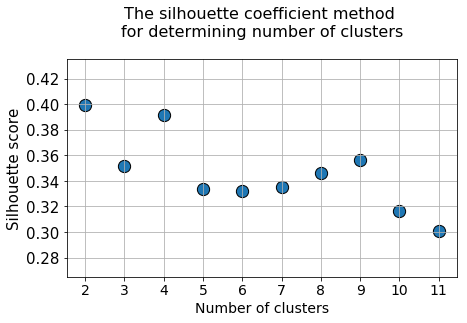

In [198]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

city_grouped_clustering = city_grouped.drop('Neighborhood', 1)

km_silhouette = []

for i in range(2,12):
    km = KMeans(n_clusters=i, random_state=0).fit(city_grouped_clustering)
    preds = km.predict(city_grouped_clustering)
    
    silhouette = silhouette_score(city_grouped_clustering,preds)
    km_silhouette.append(silhouette)
    #print("Silhouette score for number of cluster(s) {}: {}".format(i,silhouette))

plt.figure(figsize=(7,4))
plt.title("The silhouette coefficient method \nfor determining number of clusters\n",fontsize=16)
plt.scatter(x=[i for i in range(2,12)],y=km_silhouette,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("Silhouette score",fontsize=15)
plt.xticks([i for i in range(2,12)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

In [199]:
# set number of clusters
kclusters = 4

#city_grouped_clustering = city_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(city_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 2, 0, 0, 0, 0, 2, 2, 2, 0], dtype=int32)

In [200]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

city_merged = df_neigh

city_merged = pd.merge(city_merged,neighborhoods_venues_sorted.set_index('Neighborhood'),left_on='neighborhood', right_on='Neighborhood')

city_merged.head() # check the last columns!

,neighborhood,area,num_men,num_women,total,private_homes,average_wage,people_per_area,homes_per_area,latitude,...,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Ganchinho,11.20,3667,3658,7325,1921,767.35,654.017857,171.517857,-25.572076,...,Steakhouse,Housing Development,Park,Brazilian Restaurant,Hostel,Food & Drink Shop,Fondue Restaurant,Flower Shop,Flea Market,Fishing Spot
1,Sitio Cercado,11.12,50631,51779,102410,27914,934.95,9209.532374,2510.251799,-25.542701,...,Bakery,Pizza Place,Ice Cream Shop,Hot Dog Joint,Restaurant,Department Store,Burger Joint,Smoke Shop,Snack Place,Market
2,Umbará,22.47,7280,7315,14595,17064,908.70,649.532710,759.412550,-25.568169,...,Pizza Place,Electronics Store,Video Store,Gym / Fitness Center,Department Store,Soccer Field,Supermarket,Bar,Bakery,Gym
3,Abranches,4.32,5463,5702,11165,3154,1009.67,2584.490741,730.092593,-25.361474,...,Soccer Field,Grocery Store,Park,Gym / Fitness Center,Juice Bar,Bakery,Fishing Spot,Fish Market,Fish & Chips Shop,Fast Food Restaurant
4,Atuba,4.27,6156,6476,12632,3627,1211.60,2958.313817,849.414520,-25.387500,...,Café,Bakery,Gymnastics Gym,Hotel,Music Venue,Brazilian Restaurant,Farmers Market,Steakhouse,Market,Bar


## 12. Visualize neigborhoods clusters

In [201]:
# create map
map_clusters = folium.Map(location=[lat_city, lon_city], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(city_merged['latitude'], city_merged['longitude'], city_merged['neighborhood'], city_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ', Group: ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## 13. Get the recommended neigborhoods

In [202]:
origin = (lat_new_job, long_new_job)

list_dist = []

lat_list = city_merged['latitude']
long_list = city_merged['longitude']

for i in range(len(lat_list)):
    dest = (lat_list[i], long_list[i])
    list_dist.append(geodesic(origin, dest).meters)

city_merged['distance'] = list_dist
city_merged

,neighborhood,area,num_men,num_women,total,private_homes,average_wage,people_per_area,homes_per_area,latitude,...,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,distance
0,Ganchinho,11.20,3667,3658,7325,1921,767.35,654.017857,171.517857,-25.572076,...,Housing Development,Park,Brazilian Restaurant,Hostel,Food & Drink Shop,Fondue Restaurant,Flower Shop,Flea Market,Fishing Spot,12476.741179
1,Sitio Cercado,11.12,50631,51779,102410,27914,934.95,9209.532374,2510.251799,-25.542701,...,Pizza Place,Ice Cream Shop,Hot Dog Joint,Restaurant,Department Store,Burger Joint,Smoke Shop,Snack Place,Market,9192.443877
2,Umbará,22.47,7280,7315,14595,17064,908.70,649.532710,759.412550,-25.568169,...,Electronics Store,Video Store,Gym / Fitness Center,Department Store,Soccer Field,Supermarket,Bar,Bakery,Gym,12058.362478
3,Abranches,4.32,5463,5702,11165,3154,1009.67,2584.490741,730.092593,-25.361474,...,Grocery Store,Park,Gym / Fitness Center,Juice Bar,Bakery,Fishing Spot,Fish Market,Fish & Chips Shop,Fast Food Restaurant,10898.656922
4,Atuba,4.27,6156,6476,12632,3627,1211.60,2958.313817,849.414520,-25.387500,...,Bakery,Gymnastics Gym,Hotel,Music Venue,Brazilian Restaurant,Farmers Market,Steakhouse,Market,Bar,10496.129403
5,Bacacheri,6.98,10762,12344,23106,7107,3029.00,3310.315186,1018.194842,-25.396850,...,Farmers Market,Bakery,Bar,Hot Dog Joint,Café,Gym,Burger Joint,Pharmacy,Dessert Shop,8031.589490
6,Bairro Alto,7.02,20244,21789,42033,12071,1211.60,5987.606838,1719.515670,-25.405822,...,Pizza Place,Hot Dog Joint,Snack Place,Café,Sandwich Place,BBQ Joint,Restaurant,Pharmacy,Coffee Shop,8962.341799
7,Barreirinha,3.73,8079,8942,17021,5024,1272.18,4563.270777,1346.916890,-25.368564,...,Pizza Place,Soccer Field,Park,Snack Place,Market,Pharmacy,Deli / Bodega,Brazilian Restaurant,Skate Park,10202.735905
8,Boa Vista,5.14,13677,15714,29391,9212,1817.40,5718.093385,1792.217899,-25.385134,...,Bakery,Grocery Store,Burger Joint,Supermarket,Bar,Lottery Retailer,Martial Arts Dojo,Market,Salon / Barbershop,8740.096684
9,Cachoeira,3.07,3811,3927,7738,2091,908.70,2520.521173,681.107492,-25.353982,...,Hotel,Park,Bakery,Grocery Store,Gun Range,Market,Department Store,Empada House,Flower Shop,11846.844090


In [203]:
cluster_home_neigh = city_merged[city_merged['neighborhood'] == neigh_current_home]['Cluster Labels']

In [204]:
city_merged_new_neigh = city_merged.sort_values(by='distance', ascending=True)
city_merged_new_neigh = city_merged_new_neigh[city_merged_new_neigh['Cluster Labels'] == cluster_home_neigh.values[0]]

#### Recommended neigboorhoods based on distance from the new job location and population density and services similarity from the current neighborhood:

In [205]:
df = city_merged_new_neigh['neighborhood']
df.reset_index(drop=True, inplace=True)
df

0            Parolin
1         Cristo Rei
2             Mercês
3          Mossunguê
4        Pinheirinho
5            Riviera
6    Lamenha Pequena
Name: neighborhood, dtype: object